# BIOS 821 Final Exam

This is a closed-book exam. 

- Only use one of the following: `Python`, `SQL`, `bash`. Do not use `R`, `octave`, `perl` etc.
- You are allowed to use the provided `cheatsheet.pdf`.
- You are allowed to use the built-in help from Jupyter accessed with `help(obj)` or `obj?`. 
- You may not use a book, notes or the web.

There are 10 questions with the following point allocation

- Q1 to Q5 (10 points each)
- Q6 to Q10 (15 points each)

- You will notice that the maximum possible score is 125.
- The maximum allowed score is 100. If your score is above 125, it will be capped at 100.

**Note**:

This tests the ability to create a `bash` pipeline with commonly used shell functions.

**1**. (10 pints) The `/etc/passwd` file is a colon-separated file that contains the following information:

- User name.
- Encrypted password.
- User ID number (UID)
- User's group ID number (GID)
- Full name of the user (GECOS)
- User home directory.
- Login shell.

Using `bash`, only include lines with the word `Daemon` in them, and show only the unique user home directory fields.

In [1]:
! cat /etc/passwd | grep Daemon | cut -f6 -d':' | sort | uniq

/var/db/analyticsd
/var/db/findmydevice
/var/db/fpsd
/var/db/geod
/var/db/locationd
/var/db/nsurlsessiond
/var/db/nsurlstoraged
/var/db/ondemand
/var/db/timed
/var/empty
/var/virusmails


**Note**:
    
This tests the ability to do simple `numpy` manipulation and understanding of broadcasting.

**2**. (10 points) Normalize the $3 \times 4$ diagonal matrix with diagonal (1, ,2, 3) so all rows have mean 0 and standard deviation 1. The matrix has 0 everywhere not on the diagonal.

In [3]:
import numpy as np

In [3]:
A = np.c_[np.diag([1,2,3]), np.zeros(3)]
A

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.],
       [ 0.,  0.,  3.,  0.]])

In [4]:
row_means = A.mean(axis=1)
row_stds = A.std(axis=1)
M = (A - row_means[:,None])/row_stds[:,None]
M

array([[ 1.73205081, -0.57735027, -0.57735027, -0.57735027],
       [-0.57735027,  1.73205081, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027,  1.73205081, -0.57735027]])

In [5]:
M.mean(axis=1)

array([ -5.55111512e-17,  -5.55111512e-17,   0.00000000e+00])

In [6]:
M.std(axis=1)

array([ 1.,  1.,  1.])

**Note**:

This tests the ability to write a simple function and control of program flow.

**3**. (10 points) A fixed point of a funciton is a value that remains the same when the funciton is applied to it, that is $f(x) = x$. Write a function that finds the fixed poitn of another function $f$ given an intiial value $x_0$. For example, if

$$f(x) \rightarrow \sqrt{x}$$

and 

$x_0$ is any positive real number, then the function should return 1 since

$$\sqrt{1} = 1$$

Not all funcitons have a fixed point - if it taakes over 1,000 iterations, the fucntion shold return None.

- Use the function signature `fixed_point(f, x0, max_iter=1000)`. 
- Test with `fixed_point(np.sqrt, 10)`.

In [4]:
def fixed_point(f, x0, max_iter=1000):
    """Docstring."""
    x = x0
    iters = 0
    while not f(x) == x:
        x = f(x)
        iters += 1
        if iters > max_iter:
            return NOne
    return x

In [5]:
fixed_point(np.sqrt, 10)

1.0000000000010469

**Note**:

This tests the ability to use numpy indexing and vectorized flow control.

**4**. (10 points) Use `np.fromfunction` to construc the following matrix

```python
array([[5, 0, 0, 0, 5],
       [0, 4, 0, 4, 0],
       [0, 0, 3, 0, 0],
       [0, 2, 0, 2, 0],
       [1, 0, 0, 0, 1]])
```

In [9]:
import numpy as np

np.fromfunction(lambda i, j: np.where((i==j) | (i==4-j), 5-i, 0), (5,5), dtype='int')

array([[5, 0, 0, 0, 5],
       [0, 4, 0, 4, 0],
       [0, 0, 3, 0, 0],
       [0, 2, 0, 2, 0],
       [1, 0, 0, 0, 1]])

**Note**

This tests the ability to use distribution functions, write a simple simulation and basic use of `matplotlib`.

**5**. (10 points) The QQ (Quirkiness Quotient) has a normal distribution with $\mu$ = 100 and $\sigma$ = 20. If your QQ is at the 92nd percentile, what is your QQ? 

- Solve this analytically using some distribution function
- Solve this using a simulation of 1,000,000 people
- Plot the QQ PDF for QQs between 40 and 160 as a blue curve, shading the region below your QQ in blue with 50% transparency.

In [10]:
import scipy.stats as stats

In [11]:
dist = stats.norm(100, 20)

In [12]:
dist.ppf(0.92)

128.10143120619267

In [13]:
n = 1000000
rvs = dist.rvs(n)
rvs.sort()
rvs[int(92*n/100)]

128.10058484375836

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

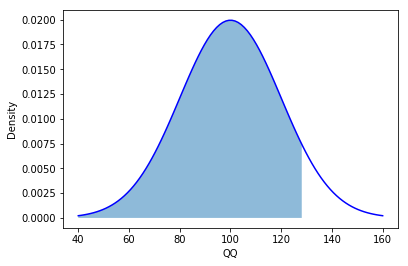

In [15]:
qq = np.linspace(40, 160, 100)
plt.plot(qq, dist.pdf(qq), c='blue')
x = np.linspace(40, dist.ppf(0.92), 100)
plt.fill_between(x, dist.pdf(x), alpha=0.5)
plt.xlabel('QQ')
plt.ylabel('Density')
pass

**Note**:

This tests the student's data munging skills with `pandas`. 

**6**. (15 points) Using `pandas`, convert the DataFrame `initial` to the form in `final`.

In [16]:
import pandas as pd

In [17]:
initial = pd.read_csv('initial.csv')
initial

pid  A-B-C-  A-B-C+  A-B+C-  A-B+C+  A+B-C-  A+B-C+  A+B+C-  A+B+C+
0  X1       1       2       3       4       5       6       7       8
1  X2       5       4       3       2       3       4       5       6

In [18]:
final = pd.read_csv('final.csv')
final

pid  A  B  C  value
0   X1  -  -  -      1
1   X2  -  -  -      5
2   X1  -  -  +      2
3   X2  -  -  +      4
4   X1  -  +  -      3
5   X2  -  +  -      3
6   X1  -  +  +      4
7   X2  -  +  +      2
8   X1  +  -  -      5
9   X2  +  -  -      3
10  X1  +  -  +      6
11  X2  +  -  +      4
12  X1  +  +  -      7
13  X2  +  +  -      5
14  X1  +  +  +      8
15  X2  +  +  +      6

In [19]:
df = initial

In [20]:
df1 = pd.melt(df, id_vars='pid')

In [21]:
df2 = pd.concat([
    df1[['pid']],
    df1.variable.str.extract('.(.).(.).(.)', expand=True),
    df1[['value']]
], axis=1)
df2.columns = ['pid', 'A', 'B', 'C', 'value']

In [22]:
df2.head()

pid  A  B  C  value
0  X1  -  -  -      1
1  X2  -  -  -      5
2  X1  -  -  +      2
3  X2  -  -  +      4
4  X1  -  +  -      3

**Note**:
    
This tests the ability to encode a not-entirely straightforward algorithm specified in plain English.

**7**. (15 points) Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

In [23]:
def sieve(n):
    """Sieve of Erastothenes."""
    
    xs = np.arange(n+1)
    keep = np.ones(len(xs)).astype('bool')
    keep[:2] = 0
    p = 2
    while True:
        idx = p + p
        while idx <= n:
            keep[idx] = 0
            idx += p
        p = xs[p+1]
        while keep[p] == 0:
            p += 1
            if p == n:
                return xs[keep]

In [24]:
sieve(1000)

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
       241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313,
       317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397,
       401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467,
       479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569,
       571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643,
       647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733,
       739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823,
       827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911,
       919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997])

**Note**:

This tests the ability to write a function that uses state machine concepts (there are other ways to find runs, but this is probably the most direct), run a simulation experiment, and use `seaborn`.

**8**. (15 points) Simulate $n$ coin toss experiments, in which you toss a coin $k$ times for each experiment. Find the maximum run length of heads (e.g. the sequence `T,T,H,H,H,T,H,H` has a maximum run length of 3 heads in each experiment. Plot the discrete distribution of maximum run lengths using `seaborn`. What is the most common maximum run length?

Let $n$ = 10,000 and $k=100$.

In [25]:
def max_run_len(xs):
    """Find maximum run length of ones.
    
    xs is a sequence of 0s and 1s.
    """
    count = 0
    max_count = 0
    in_run = True
    n = len(xs)
    for i in range(n):
        if xs[i] == 1:
            if not in_run:
                in_run = True
            count += 1
        else:
            if in_run:
                in_run = False
                max_count = max(max_count, count)
            count = 0
    return max_count            

In [26]:
def max_run_len_alt(xs):
    """Alternative method using regex to cheat."""
    
    import re
    
    return max(len(s) for s in re.split('0+', ''.join(map(str, xs))))

In [27]:
n = 10000
k = 100
expts = np.random.binomial(1, 0.5, size=(n, k))

In [28]:
max_counts = [max_run_len(xs) for xs in expts]

In [29]:
import seaborn as sns
sns.set_context('notebook', font_scale=1.5)

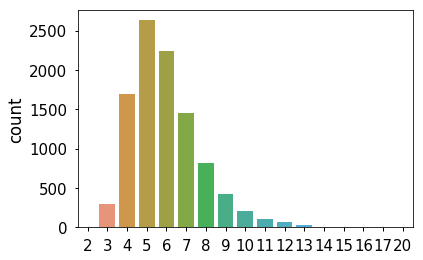

In [30]:
sns.countplot(max_counts)
pass

Most common maximum run length is 5.

**9**. (15 points) Use the DNA sequence given below to answer these questions:

- Find the reverse complement of the sequence. 
- Generate all sequences formed using a shifting window of size 3 and print the sequence with the highest count. If there are ties, print all the tied sequences. Do not use any import statement.
- Find the longest motif `AXA` where `X` can be 1 or more copies of `C`, or `G` and all `X`s are the same (for example, `ACCCCA`). If there are ties, just use the first one found. Print the sequence `?ZXA?` - that is, include the two bordering bases (for example, `TACCCAG`). You may use the regular expression package.

In [31]:
dna = '''
TCGGATGATTGCACTTATTCTCCGTTTGTTTGTGTGTTGCTGGGGGGGGACGCCTGCACGCTGTTCCAGTGCGTCGTCGT
ATCTTGGTTTGCCTCGGGGGGTGGGGCTGGAGCCTACCAGGTGTCGGTCGGATGTTTTGTCTCTGTGTGTCGAGGGTCGT
GTGGAGTCCCGGCGGGTGGGTGCTGCTGGGTGGTTGACACAGTGCGTGGTGGGTGCTTCAGCGGGGGGTGCCTCGCGCGT
GGCTGGGGTGTTGTAGTTGTCGTTTGGAAAGTGTGCGGCATAGGGGGGATGAAATCCGGTTGACCAAGATTCGGGTCGCG
TTTGGGGATTAGGATAGTTGGGTTTGGAAGGCGCGGGTATTGCCCACGTTCTTTGGCGGGGCGAGGGTGTTGGTACTCCA
TGTCCAGGCCGCTTGCCTACGGACTGTAGAGGTTCGGGAGGCGCTGGCCGGCGTGTGTTCCCTAGGTTTTGAGATAAGAG
'''

Part 1

In [32]:
def rev_comp(seq):
    """Docstring."""

    tbl = str.maketrans('ACTG', 'TGAC')
    return dna.translate(tbl)[::-1]

print(rev_comp(dna))


CTCTTATCTCAAAACCTAGGGAACACACGCCGGCCAGCGCCTCCCGAACCTCTACAGTCCGTAGGCAAGCGGCCTGGACA
TGGAGTACCAACACCCTCGCCCCGCCAAAGAACGTGGGCAATACCCGCGCCTTCCAAACCCAACTATCCTAATCCCCAAA
CGCGACCCGAATCTTGGTCAACCGGATTTCATCCCCCCTATGCCGCACACTTTCCAAACGACAACTACAACACCCCAGCC
ACGCGCGAGGCACCCCCCGCTGAAGCACCCACCACGCACTGTGTCAACCACCCAGCAGCACCCACCCGCCGGGACTCCAC
ACGACCCTCGACACACAGAGACAAAACATCCGACCGACACCTGGTAGGCTCCAGCCCCACCCCCCGAGGCAAACCAAGAT
ACGACGACGCACTGGAACAGCGTGCAGGCGTCCCCCCCCAGCAACACACAAACAAACGGAGAATAAGTGCAATCATCCGA



Part 2

In [33]:
d = {}
seq = ''.join(dna.split())
for window in zip(seq, seq[1:], seq[2:]):
    s = ''.join(window)
    d[s] = d.get(s, 0) + 1

In [34]:
sorted(d.items(), key=lambda x: x[1], reverse=True)[0]

('GGG', 36)

Part 3

In [35]:
import re

pat = re.compile(r'(.A([T|C|G])\2+A.)')
seq = ''.join(dna.split())
max(pat.findall(seq), key=lambda x: len(x[0]))[0]

'TAGGGGGGAT'

**10**. (15 points) Newton's method finds the zeros of a function via the iterative process given by 

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$

Use Newtons method to find all the roots, and the location of the function maximum and minimum of 

$$x^5 - 9x^4 + 7x^3 - 2x^2 +191x - 3$$ 

in the range $-1 \lt x \lt 8$. 

You do not need to include the boundaries in the search for the maximum and minimum.

Make a plot to visualize the three functions ($f, f', f''$), indicating the location of the roots (in red) and critical points (in black) on the x-axis.

In [36]:
def f(x):
    """Polynomial function."""
    return x**5 - 9*x**4 + 7*x**3 -2*x**2 + 191*x - 3

def f1(x):
    """First derivative."""
    return 5*x**4 -36*x**3 + 21*x**2 -4*x + 191

def f2(x):
    """Second derivative."""
    return 20*x**3 -108*x**2 + 42*x - 4

In [37]:
def newton(x0, f, fprime):
    """Newton's method."""
    
    x = x0
    delta = f(x) / fprime(x)
    while abs(delta) > 1e-6:
        x = x - delta
        delta = f(x) / fprime(x)
    return x

In [38]:
r1 = newton(0, f, f1)
r2 = newton(4, f, f1)
r3 = newton(8, f, f1)
c1 = newton(2, f1, f2)
c2 = newton(6, f1, f2)

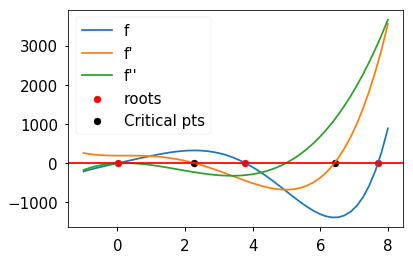

In [39]:
x = np.linspace(-1, 8)
plt.plot(x, f(x), label="f")
plt.plot(x, f1(x), label="f'")
plt.plot(x, f2(x), label="f''")
plt.axhline(0, c='red')
plt.scatter([r1,r2,r3], [0,0,0], c='red', label='roots')
plt.scatter([c1, c2], [0,0], c='black', label='Critical pts')
plt.legend()
pass